In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df = pd.read_csv('../Data Cleaning/fillKNN_data_final.csv')
df.head()

,accelerationTime,bodyType,brand,cargoVolume,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,fuelConsumption,...,price,roofLoad,seatingCapacity,speed,torque,vEenginePower,vehicleTransmission,weightTotal,wheelbase,width
0,6.8,3.0,4.0,1020.0,1.0,6.0,218.0,1781.0,55.0,9.1,...,42.247,75.0,5.0,238.0,270.0,154.0,2.0,1935.0,2519.0,1763.0
1,7.8,7.0,4.0,1680.0,1.0,2.0,115.0,1968.0,73.0,5.9,...,68.930,100.0,5.0,241.0,400.0,150.0,1.0,2425.0,2924.0,1886.0
2,9.2,7.0,30.0,1668.0,0.0,4.0,146.0,1798.0,50.0,6.2,...,30.580,75.0,5.0,210.0,174.0,104.0,2.0,1790.0,2595.0,1770.0
3,9.5,7.0,4.0,1680.0,0.0,1.0,109.0,1968.0,73.0,5.4,...,64.510,100.0,5.0,219.0,370.0,120.0,1.0,2330.0,2924.0,1886.0
4,7.0,7.0,4.0,1680.0,0.0,2.0,144.0,1984.0,73.0,7.4,...,69.770,100.0,5.0,250.0,370.0,180.0,1.0,2310.0,2924.0,1886.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75824 entries, 0 to 75823
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         75824 non-null  float64
 1   bodyType                 75824 non-null  float64
 2   brand                    75824 non-null  float64
 3   cargoVolume              75824 non-null  float64
 4   driveWheelConfiguration  75824 non-null  float64
 5   eLabel                   75824 non-null  float64
 6   emissionsCO2             75824 non-null  float64
 7   engineCapacity           75824 non-null  float64
 8   fuelCapacity             75824 non-null  float64
 9   fuelConsumption          75824 non-null  float64
 10  fuelType                 75824 non-null  float64
 11  height                   75824 non-null  float64
 12  length                   75824 non-null  float64
 13  modelDate                75824 non-null  float64
 14  numberOfDoors         

In [20]:
cols = df.columns
cat_cols = ['bodyType', 'brand', 'driveWheelConfiguration', 'eLabel', 'fuelType', 'modelDate', 'numberOfDoors', 'numberOfForwardGears', 'roofLoad', 'seatingCapacity', 'vehicleTransmission']
num_cols = cols.difference(cat_cols)

Index(['accelerationTime', 'cargoVolume', 'emissionsCO2', 'engineCapacity',
       'fuelCapacity', 'fuelConsumption', 'height', 'length', 'payload',
       'price', 'speed', 'torque', 'vEenginePower', 'weightTotal', 'wheelbase',
       'width'],
      dtype='object')

In [23]:
df.describe()

,accelerationTime,bodyType,brand,cargoVolume,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,fuelConsumption,...,price,roofLoad,seatingCapacity,speed,torque,vEenginePower,vehicleTransmission,weightTotal,wheelbase,width
count,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.00000,...,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000,75824.000000
mean,10.708362,4.785042,50.135392,1190.551250,0.448802,5.008599,169.237764,1965.746252,59.332947,7.01210,...,38.613995,80.699726,4.948064,198.273001,251.031407,108.524544,1.431486,1932.942388,2661.938885,1771.583256
std,2.961359,2.154607,28.374631,798.062016,0.746252,1.577886,49.695381,700.950334,11.829327,4.27288,...,30.560621,23.573733,0.666354,28.842496,117.976265,54.106869,1.007745,372.039611,186.491724,85.074021
min,2.600000,0.000000,0.000000,31.000000,0.000000,0.000000,12.000000,599.000000,9.000000,0.60000,...,4.152000,0.000000,2.000000,80.000000,38.000000,12.000000,0.000000,690.000000,216.000000,1300.000000
25%,8.700000,3.000000,28.000000,570.000000,0.000000,4.000000,134.000000,1580.000000,51.000000,5.40000,...,21.390000,75.000000,5.000000,178.000000,160.000000,75.000000,0.000000,1685.000000,2547.000000,1710.000000
50%,10.600000,4.000000,61.000000,1167.000000,0.000000,6.000000,163.000000,1948.000000,60.000000,6.70000,...,31.950000,75.000000,5.000000,195.000000,235.000000,99.000000,2.000000,1920.000000,2660.000000,1777.000000
75%,12.400000,7.000000,72.000000,1510.000000,1.000000,6.000000,197.000000,1999.000000,66.000000,8.20000,...,46.278250,100.000000,5.000000,216.000000,320.000000,128.000000,2.000000,2130.000000,2760.000000,1826.000000
max,35.000000,9.000000,88.000000,11500.000000,2.000000,6.000000,595.000000,8277.000000,208.000000,999.90000,...,909.770000,550.000000,9.000000,350.000000,1100.000000,652.000000,4.000000,3901.000000,4325.000000,2240.000000


#1. EXPLORE SKEWNESS OF DATA
First of all, we should explore the skewness of numerical features in our data. They are all features except for features in black_attr, which are denoted for categorical data. Overall, the distribution of these data is approximately symmetric, which infers that there are only a small number of outliers in these features. Outliers are distributed in some features such as roodLoad, speed, torque, vEenginePower. In other words, numerical atributes in this data set can be used efficiently

In [24]:
#Explore the skewness of datg
def explore_skewness(train_df, x=None):
    sns.set(rc={'figure.figsize':(15,5)})
    fig = plt.figure()
    sns.distplot(train_df[x], kde=True, bins=100)
    plt.axvline(train_df[x].mean(), c='red', ls='-', lw=3, label='Mean {}'.format(x))
    plt.axvline(train_df[x].median(),c='blue',ls='-',lw=3, label='Median {}'.format(x))
    plt.title('Distribution of {} Scores'.format(x), fontsize=20, fontweight='bold')
    plt.legend()
    plt.savefig('../EDA_figure/numerical/distribution/{}.jpg'.format(x))


C:\Users\vuhoa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vuhoa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vuhoa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

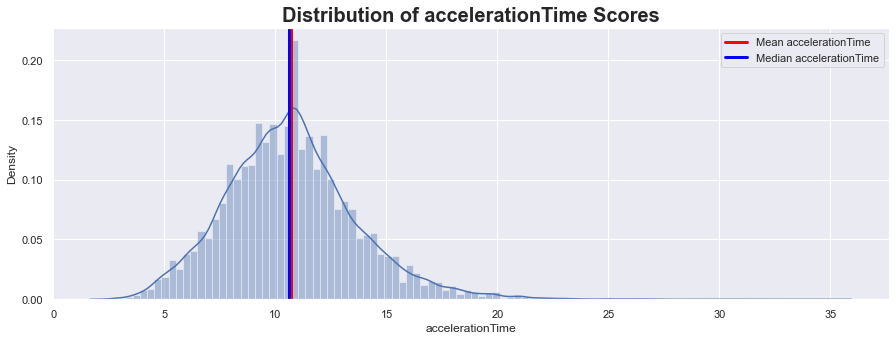

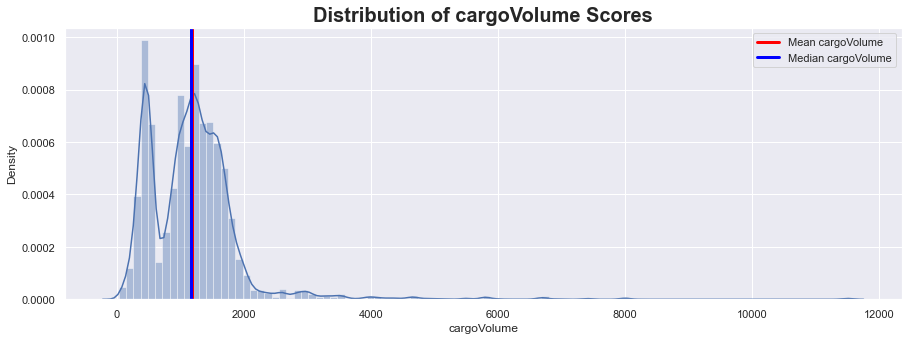

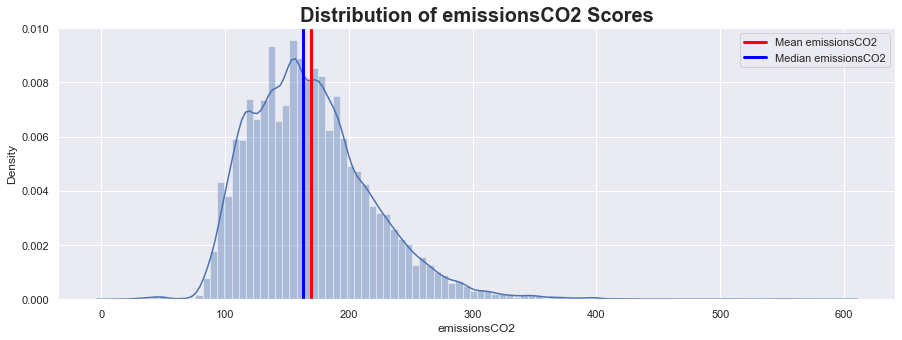

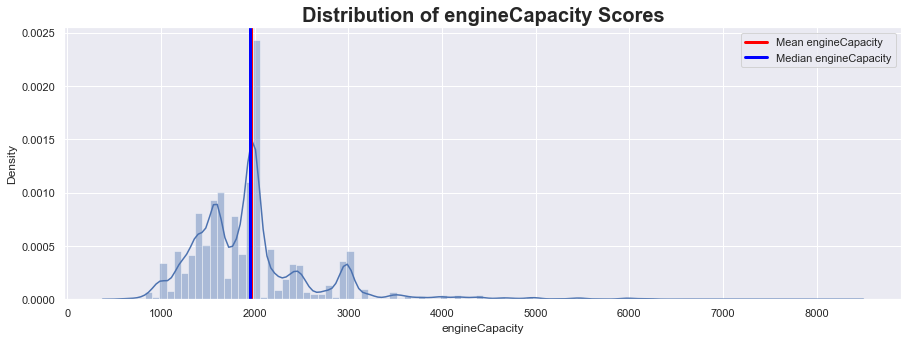

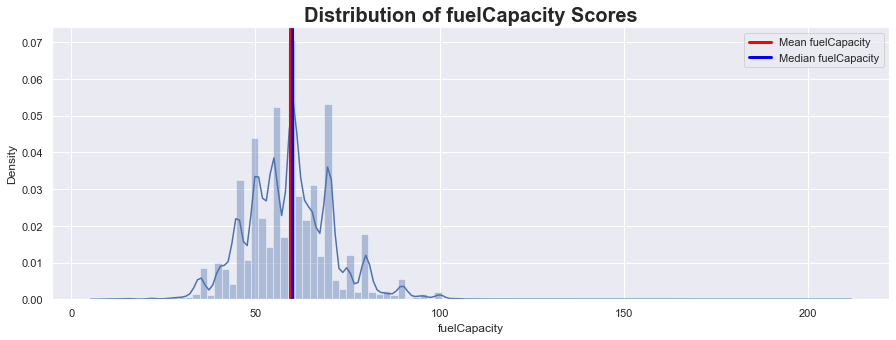

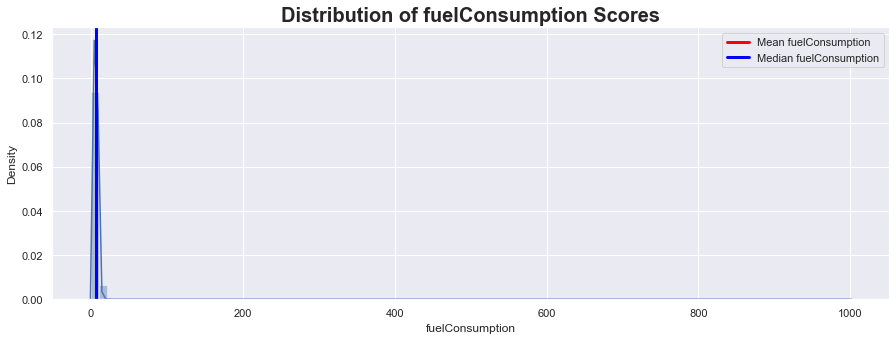

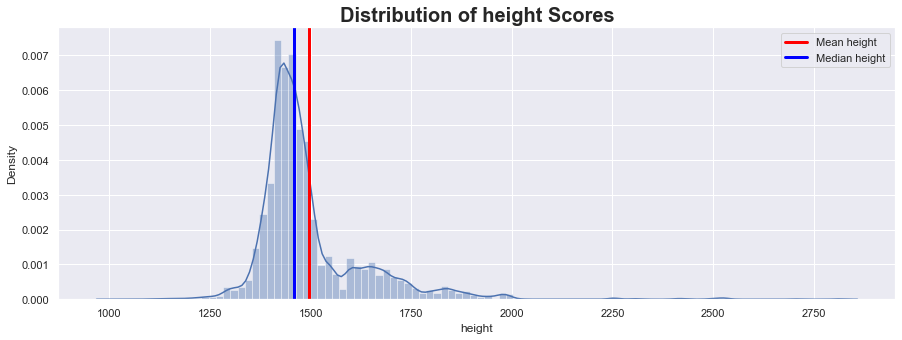

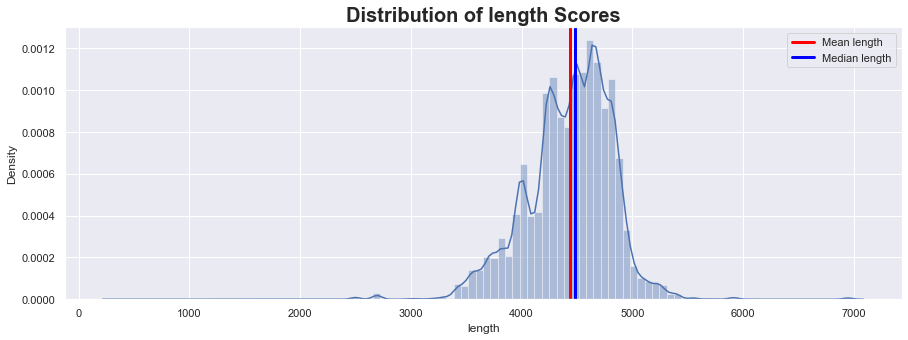

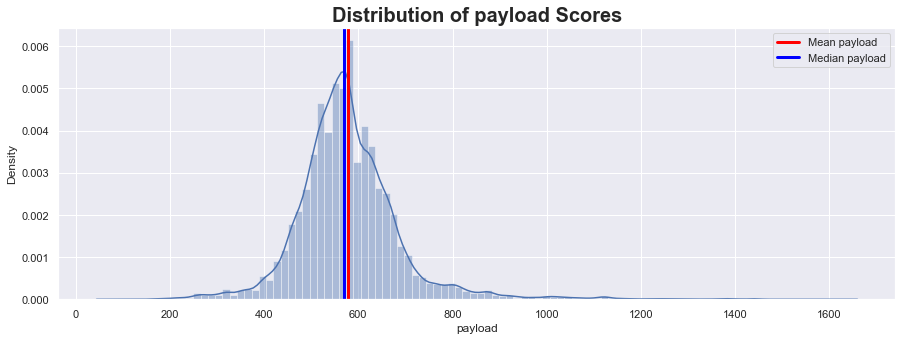

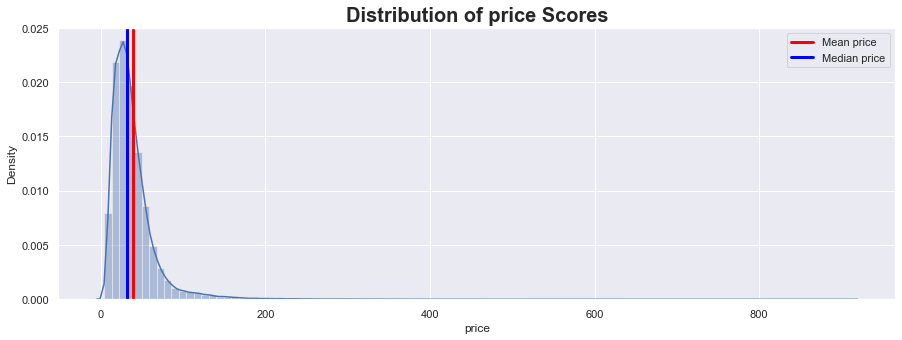

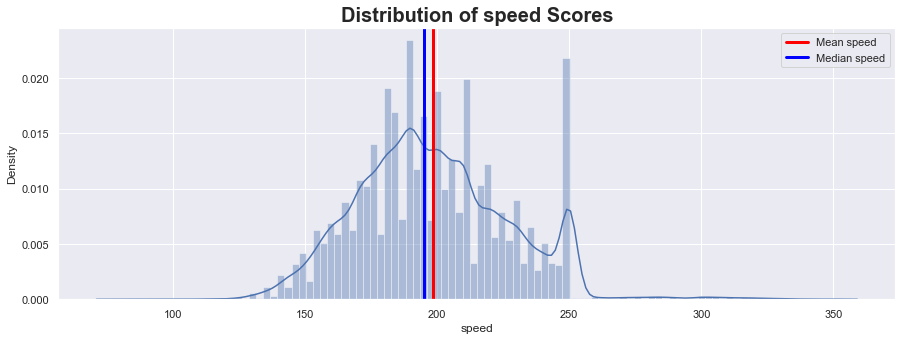

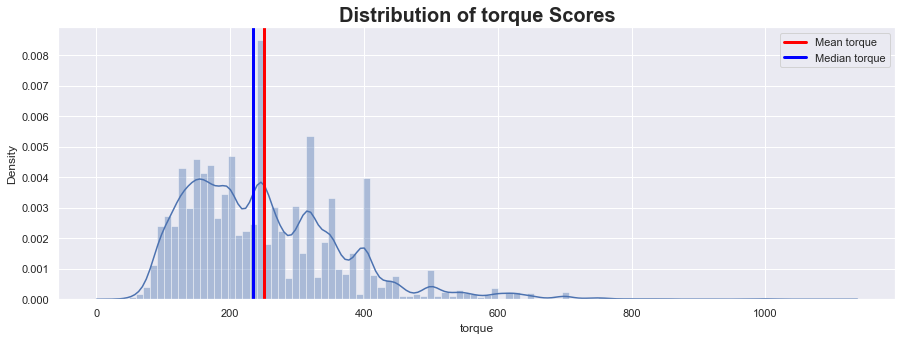

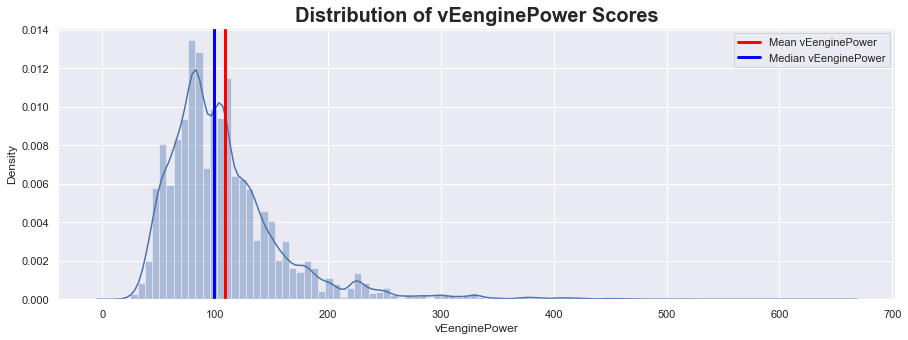

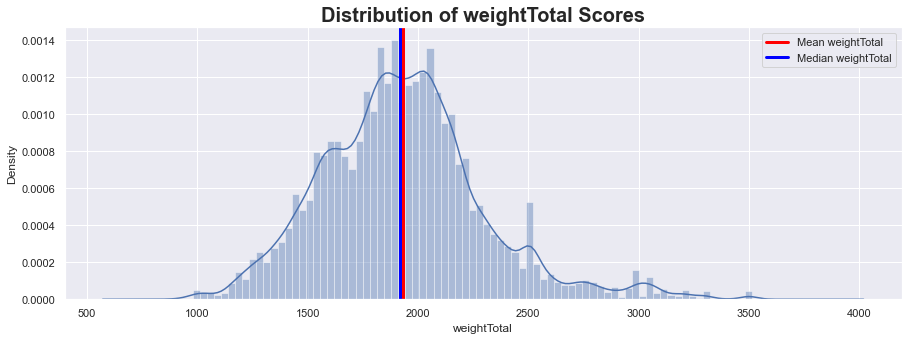

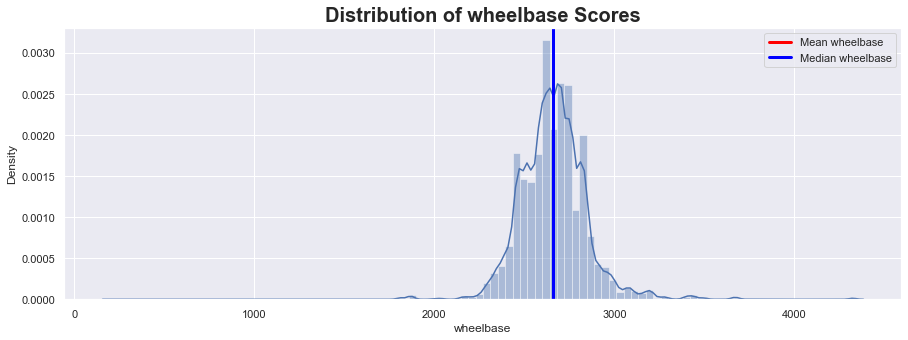

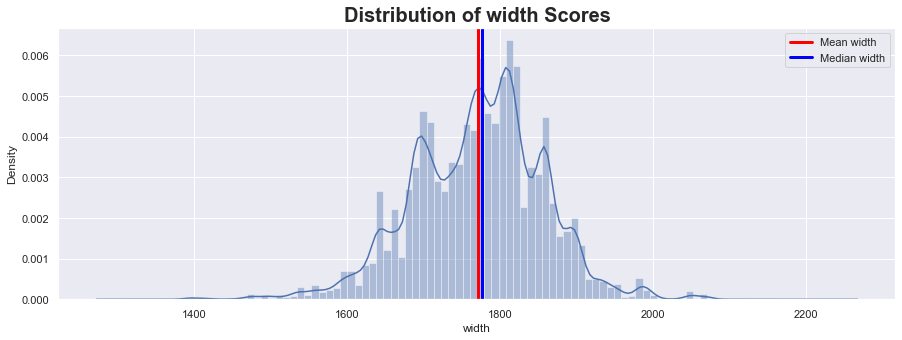

In [25]:
for c in num_cols:
    explore_skewness(df, c)

To explore about the covariance between price and other numerical attributes, we can use scatter plot. As can be seen from these following graphs, for each feature, the relationship to price is distinct.
To determine the relationship towards price, we should see the following jointplot. Except for torque, vEengineDisplacement and vEenginePower, the other features have a week relation towards price feature. In the other word, the torque, vEengineDisplacement and vEenginePower can be used for evaluating with higher coefficient to predict the price.

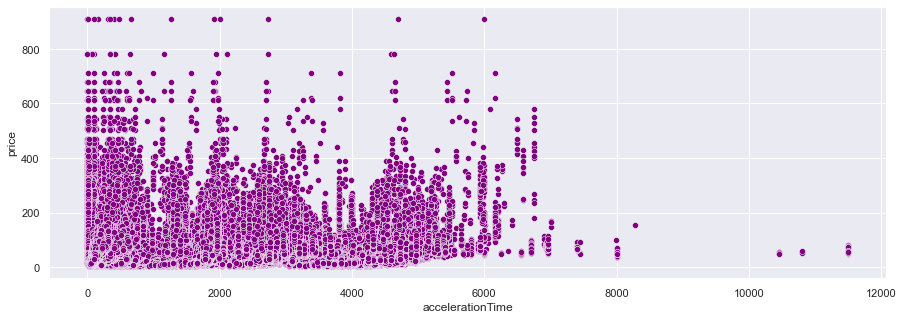

In [27]:
for c in num_cols:
    if c != 'price':
        sns.scatterplot(x=c, y="price", data=df,color='purple')
        plt.savefig("../EDA_figure/numerical/scatter/distribution_{}_with_price.jpg")

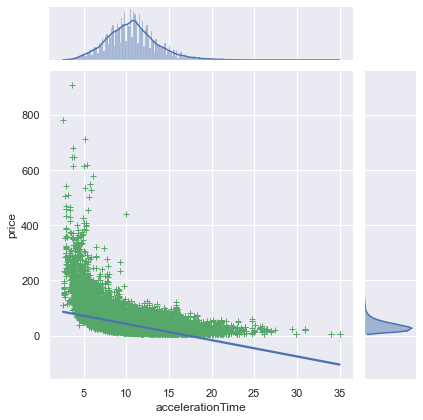

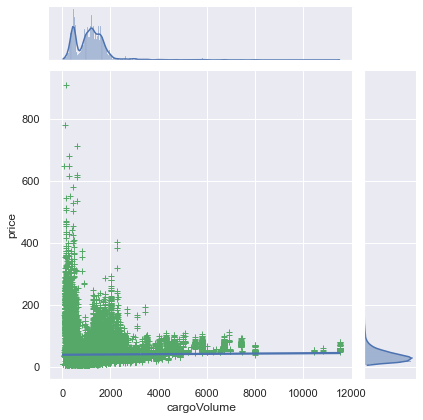

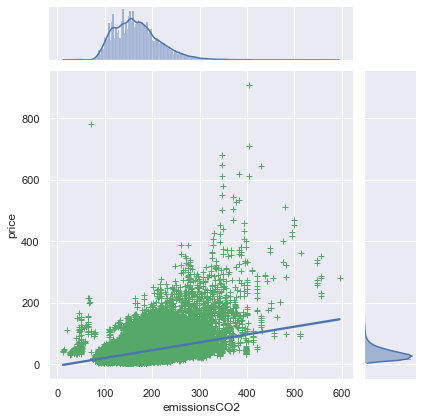

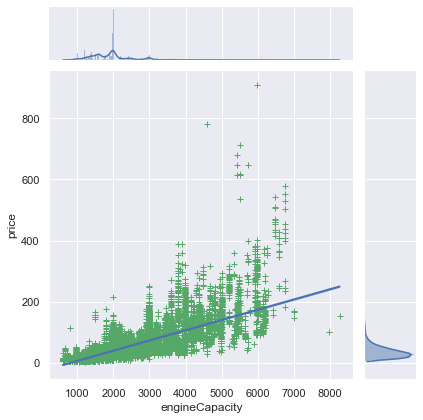

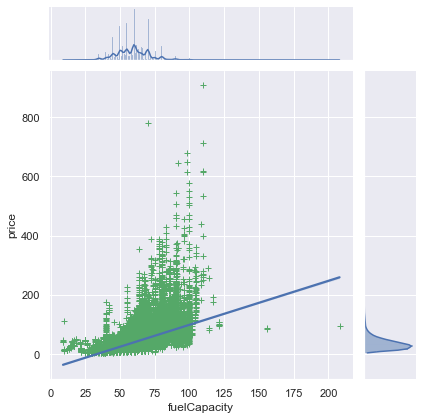

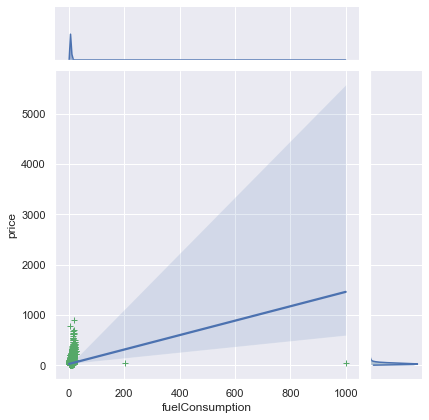

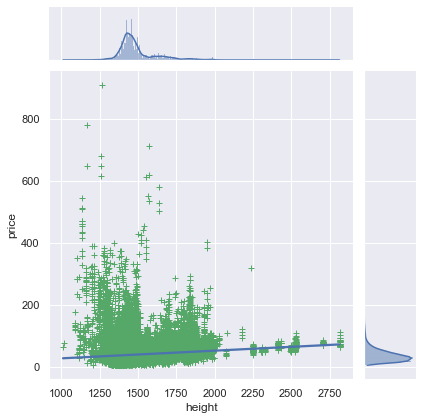

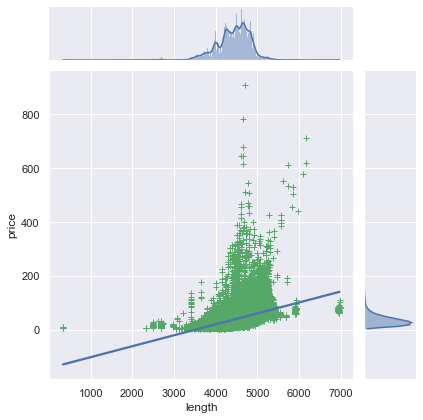

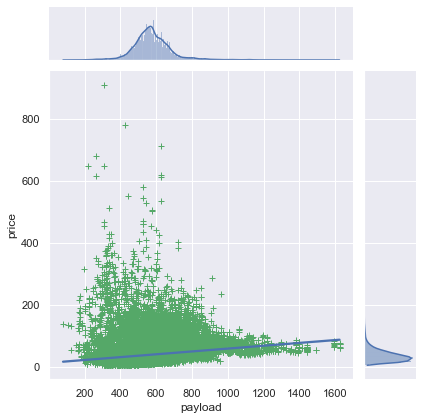

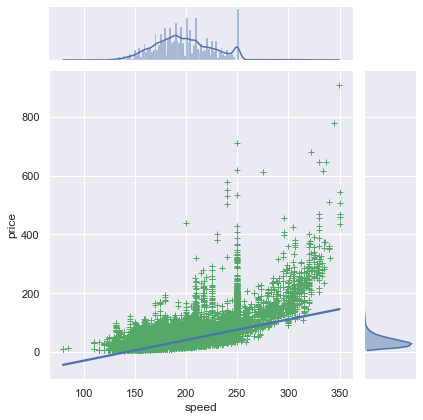

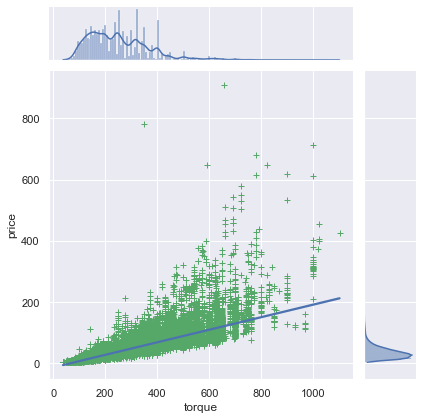

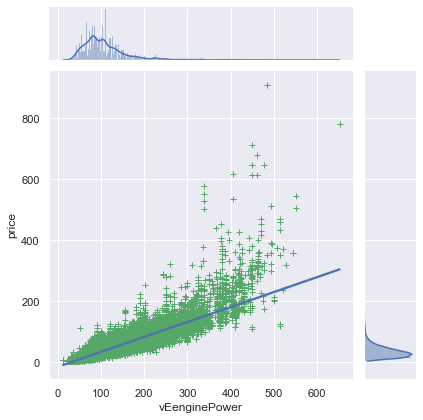

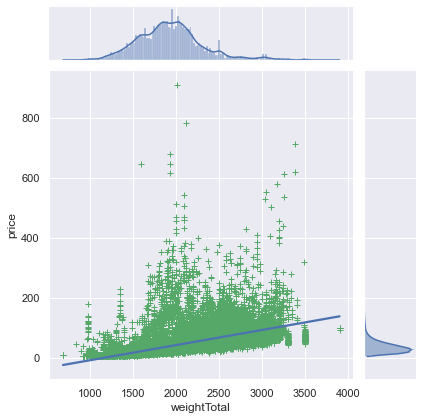

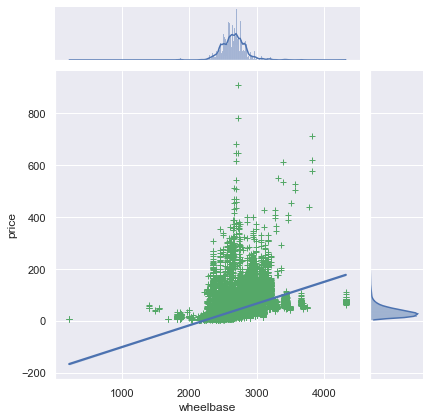

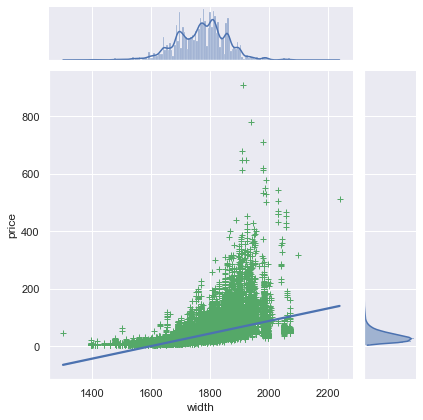

In [29]:
for c in num_cols:
    if c != 'price':
        g = sns.jointplot(x=c, y="price", data=df, kind="reg", color="b")
        g.plot_joint(plt.scatter, c="g", s=40, linewidth=1, marker="+")
        g.ax_joint.collections[0].set_alpha(0)
        g.set_axis_labels(c, "price")
        plt.savefig("../EDA_figure/numerical/joint_plot/distribution_{}_with_price.jpg")

#2. EXPLORE CATEGORICAL FEATURES
Next, we will explore the other categorical features in our dataset
First of all, we can see from countplot for each categorical feature, we can see that some features have a high bias on one or two values of that feature. For more detail,
+ seatingCapacity is mostly 5 and 4 seats
+ cEfuelType is mostly type 2 and 3
+ vEengineType is mostly type 1
Therefore, we can see that the information of these feature will not affect too much on the prediction evaluation. In the other words, we can reduce dimensions by eliminating these redundant feature.
Finally, to prove that conclusion, we will use boxplot to show the relation between categorical features and price. We can see that except for seating capacity, the values of each feature does not affect too much on the price of that car.
+ seating capacity: For car with 2 seats, the price is quite high whereas the price of 4-seat or 5-seat car is quite slow.
+ vehicle transmission: some methods should be applied for evaluating vehicle transmission's effect on the car price. However, the price of 0-transmission will be much higher than other sorts.

In [50]:
df[cat_cols[0]].value_counts()

3.0    24057
6.0    15825
7.0    14119
8.0     7551
4.0     6311
2.0     3419
1.0     3118
0.0     1233
5.0      115
9.0       76
Name: bodyType, dtype: int64

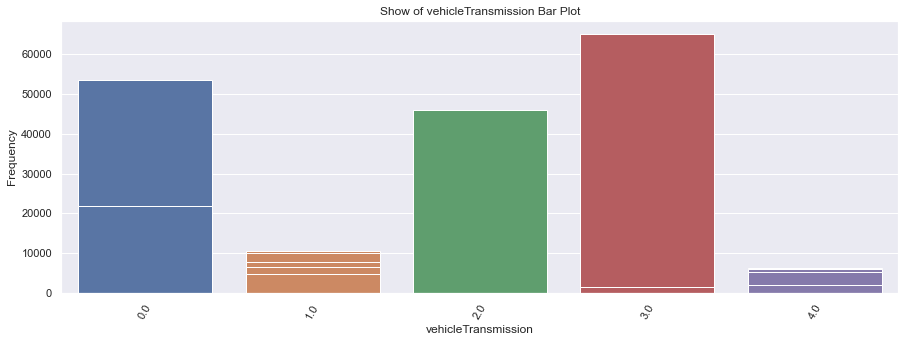

In [51]:
for label in cat_cols:
    num_labels = min(len(df[label].value_counts()), 10)
    sns.barplot(x= list(df[label].value_counts().index)[0:num_labels],
    y= list(df[label].value_counts().values)[0:num_labels])
    plt.xlabel(label)
    plt.xticks(rotation=60)
    plt.ylabel("Frequency")
    plt.title('Show of {} Bar Plot'.format(label))
    plt.savefig("../EDA_figure/categorical/barplot/{}_barplot.jpg".format(label))

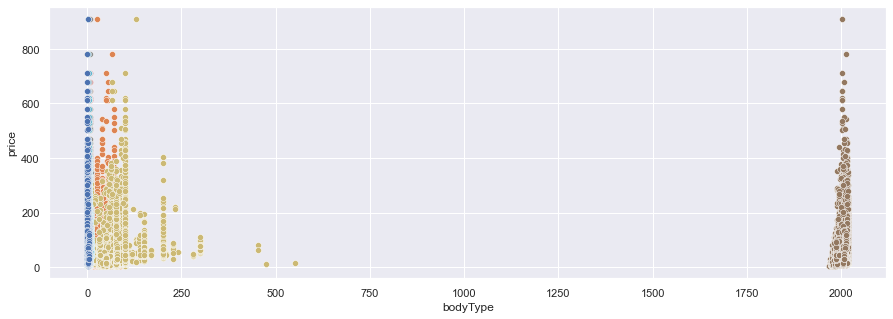

In [52]:
for c in cat_cols:
    sns.scatterplot(y ='price', x = c, data = df,palette='Accent')
    plt.savefig("../EDA_figure/categorical/scatter/{}_scatter.jpg".format(c))

Finally, we will draw heat map for 16 features. We can see, to price, the high covariance will lie in some features such as engineCapacity, torque, vEenginePower, seatingCapacity and engineCapacity

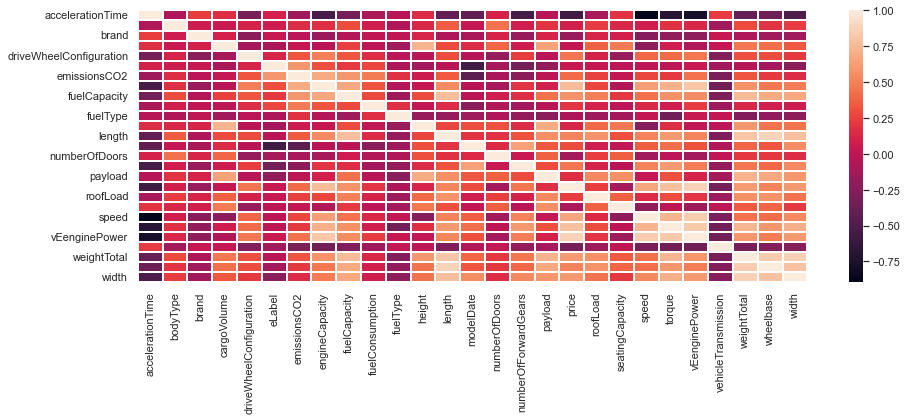

In [53]:
ax = sns.heatmap(df.corr(), linewidth=2)
plt.savefig('../EDA_figure/heat_map.jpg')